Import Main Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [ ]:
data=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [ ]:
def describe(df):                        # Function to explore major elements in a Dataset
                                         # Will help to find null values present and deal with them
  columns=df.columns.to_list()           # Function will help to directly find numerical and categorical columns
  ncol=df.describe().columns.to_list()
  ccol=[]
  for i in columns:
    if(ncol.count(i)==0):
      ccol.append(i)
    else:
      continue
  print('Name of all columns in the dataframe:')
  print(columns)
  print('')
  print('Number of columns in the dataframe:')
  print(len(columns))
  print('')
  print('Name of all numerical columns in the dataframe:')
  print(ncol)
  print('')
  print('Number of numerical columns in the dataframe:')
  print(len(ncol))
  print('')
  print('Name of all categorical columns in the dataframe:')
  print(ccol)
  print('')
  print('Number of categorical columns in the dataframe:')
  print(len(ccol))
  print('')
  print('------------------------------------------------------------------------------------------------')
  print('')
  print('Number of Null Values in Each Column:')
  print('')
  print(df.isnull().sum())
  print('')
  print('')
  print('Number of Unique Values in Each Column:')
  print('')
  print(df.nunique())
  print('')
  print('')
  print('Basic Statistics and Measures for Numerical Columns:')
  print('')
  print(df.describe().T)
  print('')
  print('')
  print('Other Relevant Metadata Regarding the Dataframe:')
  print('')
  print(df.info())
  print('')
  print('')

In [ ]:
# Shows Summary Statistics of The Data Set
describe(data)

Name of all columns in the dataframe:
['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name']

Number of columns in the dataframe:
11

Name of all numerical columns in the dataframe:
['Unnamed: 0', 'Clothing ID', 'Age', 'Rating', 'Recommended IND', 'Positive Feedback Count']

Number of numerical columns in the dataframe:
6

Name of all categorical columns in the dataframe:
['Title', 'Review Text', 'Division Name', 'Department Name', 'Class Name']

Number of categorical columns in the dataframe:
5

------------------------------------------------------------------------------------------------

Number of Null Values in Each Column:

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count  

##Visualization and Data Cleaning

Text(0.5, 1.0, 'Age Distribution')

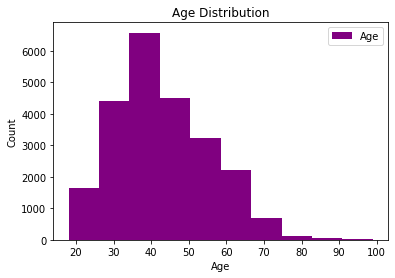

In [ ]:
plt.hist(data['Age'], color="purple", label = "Age")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")

In [ ]:
 #Analysis of Ratings
import plotly.express as px
fig = px.histogram(df['Rating'],
                   labels={'value': 'Rating',
                           'count': 'Frequency',
                           'color': 'Rating'}, color=df['Rating'])
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Ratings',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



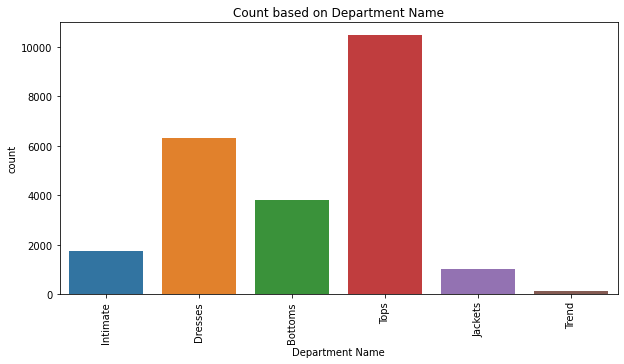

In [ ]:
#Analysis on based on department names
plt.figure(figsize=(10,5))
sns.countplot(data['Department Name']);
plt.title('Count based on Department Name')
plt.xticks(rotation=90)
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



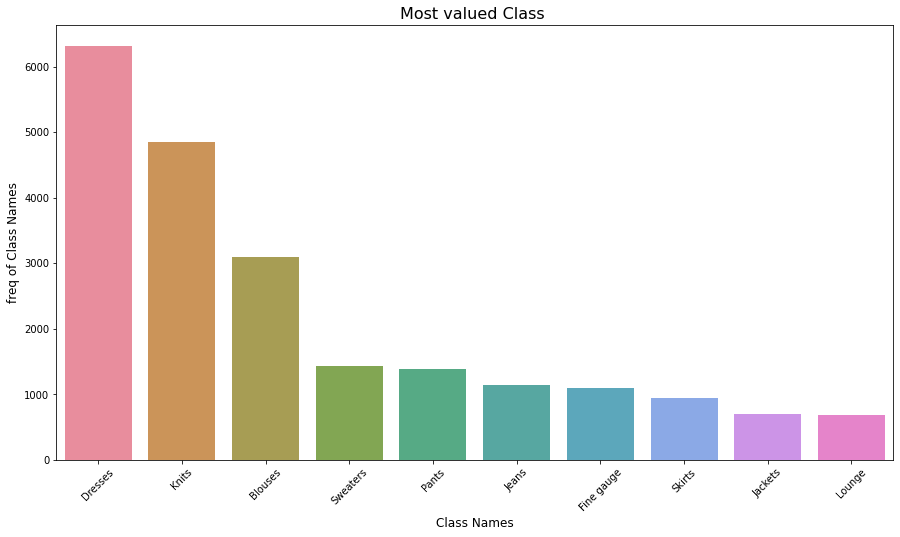

In [ ]:
# visualizing the most valued Class  prefered for recommendaion
industry = data['Class Name'].value_counts().head(10)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, alpha=0.9, palette="husl")
plt.xticks(rotation=45)
plt.xlabel('Class Names', fontsize=12)
plt.ylabel('freq of Class Names', fontsize=12)
plt.title("Most valued Class ", fontsize=16)
plt.show()

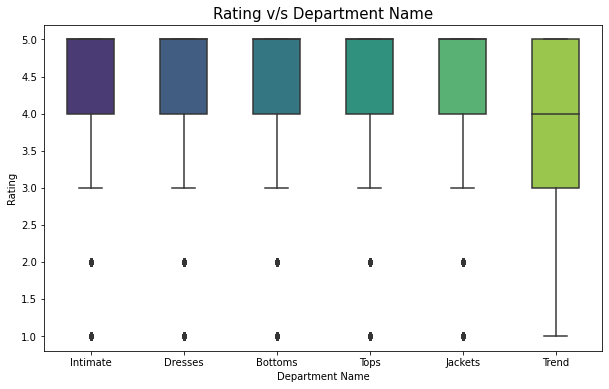

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department Name', y='Rating', width=0.5, palette='viridis', data=data)
plt.title('Rating v/s Department Name', size=15)
plt.show()

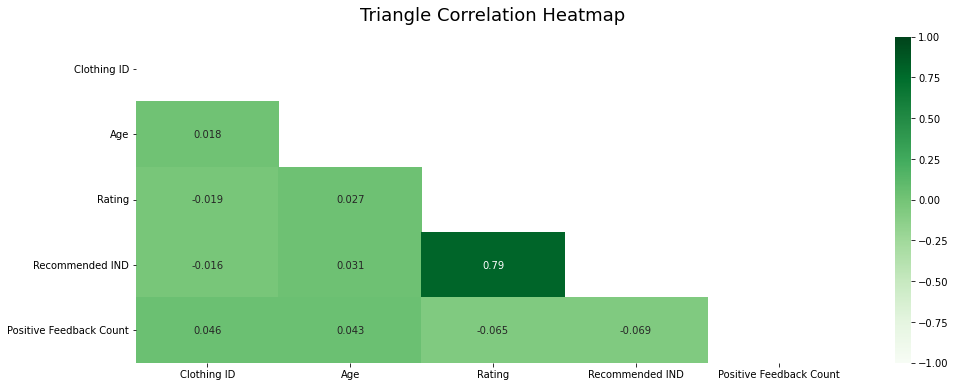

In [ ]:
data.drop(columns='Unnamed: 0', axis=1, inplace=True)
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Greens');
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
# Check for Missing Values

data.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
data.drop(labels =['Clothing ID','Title','Class Name'],axis = 1,inplace = True) #Dropping unwanted columns

In [ ]:
data = data[~data['Review Text'].isnull()]  #Dropping columns which don't have any review

In [ ]:
px.scatter(data, x="Age", y="Positive Feedback Count", facet_row="Recommended IND", facet_col="Rating",trendline="ols",category_orders={"Rating": [1,2,3,4,5],'Recommended IND':[0,1]})

In [ ]:
px.box(data, x="Age", y="Division Name", orientation="h",color = 'Recommended IND')

In [ ]:
#Cleaning Data for Models

err1 = data['Review Text'].str.extractall("(&amp)")
err2 = data['Review Text'].str.extractall("(\xa0)")

In [ ]:
print('with &amp',len(err1[~err1.isna()]))
print('with (\xa0)',len(err2[~err2.isna()]))

with &amp 37
with ( ) 6


In [ ]:
!pip install TextBlob
from textblob import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Creating New Features wrt Text

data['polarity'] = 0
data['polarity'] = data['Review Text'].map(lambda text: TextBlob(text).sentiment.polarity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data['polarity']

0        0.633333
1        0.339583
2        0.073675
3        0.550000
4        0.512891
           ...   
23481    0.552667
23482    0.091667
23483    0.414286
23484    0.322222
23485    0.413889
Name: polarity, Length: 22641, dtype: float64

In [ ]:
px.histogram(data, x = 'polarity')

In [ ]:
# Creation of Review Len Feature

data['review_len'] = 0
data['review_len'] = data['Review Text'].astype(str).apply(len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
px.histogram(data, x = 'review_len')

In [ ]:
data['token_count']=0
data['token_count'] = data['Review Text'].apply(lambda x: len(str(x).split()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



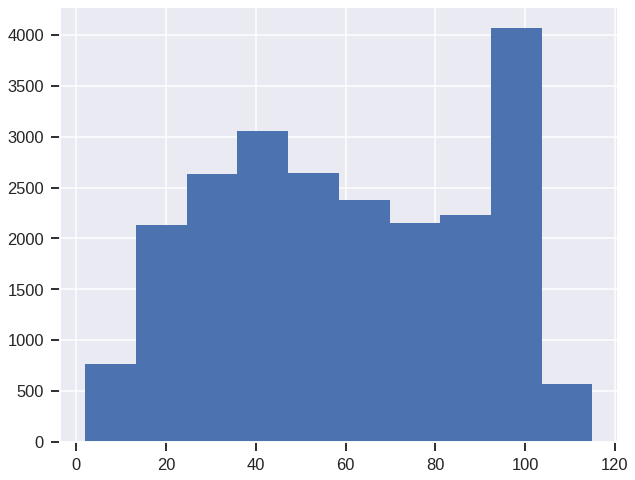

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
plt.hist(data= data, x = 'token_count');
plt.show()

In [ ]:
# Example Review with Positive Polarity
print(data.loc[data.polarity == 1,['Review Text']].sample(1))

                                         Review Text
2636  This dress is so versatile. great summer wear!


In [ ]:
# Example Review with Negative Polarity
print(data.loc[data.polarity < 0,['Review Text']].sample(1))

                                             Review Text
22803  Couldn't make it work, even belted. ivory colo...


In [ ]:
# Example Review with Neutral Polarity
print(data.loc[data.polarity == 0.5,['Review Text']].sample(1))

                                             Review Text
12229  I really liked the design. ordered a medium wh...


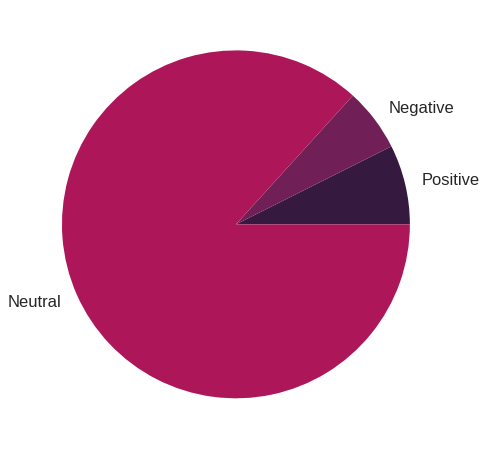

In [ ]:
negative = (len(data.loc[data.polarity <0,['Review Text']].values)/len(data))*100
positive = (len(data.loc[data.polarity >0.5,['Review Text']].values)/len(data))*100
neutral  = len(data.loc[data.polarity >0 ,['Review Text']].values) - len(data.loc[data.polarity >0.5 ,['Review Text']].values)
neutral = neutral/len(data)*100
fig = plt.figure(figsize=(10,8))
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
palette_color = sns.color_palette('rocket')
plt.pie([positive,negative,neutral], labels = ['Positive','Negative','Neutral'],colors=palette_color);

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def top_n_ngram(corpus,n = None,ngram = 1):
    vec = CountVectorizer(stop_words = 'english',ngram_range=(ngram,ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus) #Have the count of  all the words for each review
    sum_words = bag_of_words.sum(axis =0) #Calculates the count of all the word in the whole review
    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    return words_freq[:n]

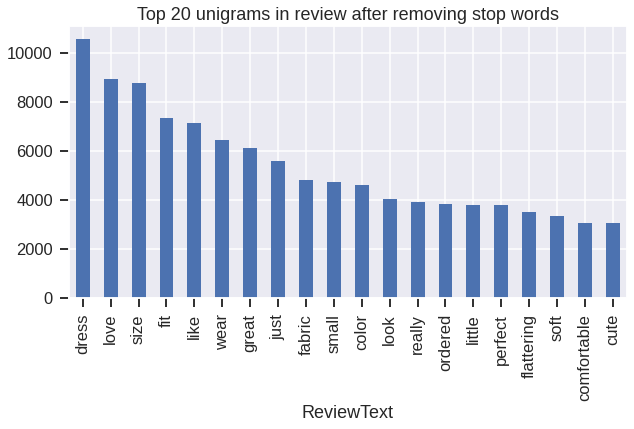

In [ ]:
# Top 20 Words

common_words = top_n_ngram(data['Review Text'], 20,1)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
plt.figure(figsize =(10,5))
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 unigrams in review after removing stop words')

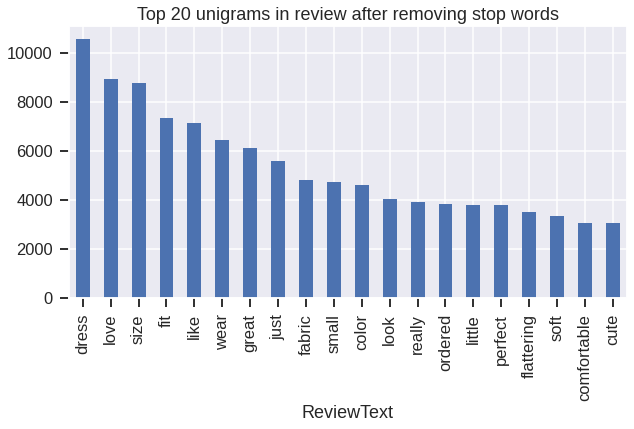

In [ ]:
# Top 20 Speech Parts

common_words = top_n_ngram(data['Review Text'], 20,1)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
plt.figure(figsize =(10,5))
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 unigrams in review after removing stop words')

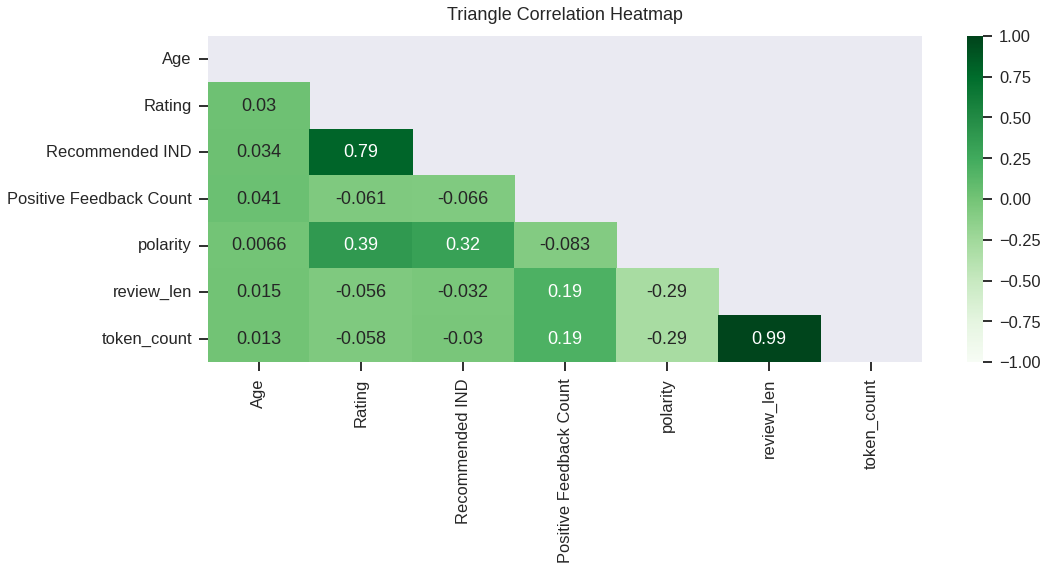

In [ ]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Greens');
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
# Finding Collinear Predictors
set1 =set()
cor = data.corr()
for i in cor.columns:
    for j in cor.columns:
        if cor[i][j]>0.8 and i!=j:
            set1.add(i)
print(set1)

{'review_len', 'token_count'}


In [ ]:
#Dropping 1 of the 2 Variables
data = data.drop(labels = ['token_count'],axis = 1)

In [ ]:
df=data.copy()
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,polarity,review_len
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,0.633333,53
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,0.339583,303
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,0.073675,500
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,0.550000,124
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,0.512891,192


In [ ]:
# One Hot Encoding of a Few Variables

def OHE(dfcolumn):
  global df
  dfcolumn.nunique()
  len(df.columns)
  finallencol = (dfcolumn.nunique() - 1) + (len(df.columns)-1)
  dummies = pd.get_dummies(dfcolumn, drop_first=True, prefix=dfcolumn.name)
  df=pd.concat([df,dummies],axis='columns')
  df.drop(columns=dfcolumn.name,axis=1,inplace=True) # We have to drop columns to aviod multi-collinearity
  if(finallencol==len(df.columns)):
    print('One Hot Encoding was successful!')
    print('')
  else:
    print('Error in OHE XXXX')
  return df

In [ ]:
OHE(df['Division Name'])
OHE(df['Department Name'])

One Hot Encoding was successful!

One Hot Encoding was successful!



,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,polarity,review_len,Division Name_General Petite,Division Name_Initmates,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,0.633333,53,0,1,0,1,0,0,0
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,0.339583,303,0,0,1,0,0,0,0
2,60,I had such high hopes for this dress and reall...,3,0,0,0.073675,500,0,0,1,0,0,0,0
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,0.550000,124,1,0,0,0,0,0,0
4,47,This shirt is very flattering to all due to th...,5,1,6,0.512891,192,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,34,I was very happy to snag this dress at such a ...,5,1,0,0.552667,131,1,0,1,0,0,0,0
23482,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,0.091667,223,1,0,0,0,0,1,0
23483,31,"This fit well, but the top was very see throug...",3,0,1,0.414286,208,1,0,1,0,0,0,0
23484,28,I bought this dress for a wedding i have this ...,3,1,2,0.322222,427,0,0,1,0,0,0,0


In [ ]:
#Dropping a few redundant variables
df.head()
df = df.drop(labels = ['Review Text','Recommended IND'],axis = 1)
df.head()

,Age,Rating,Positive Feedback Count,polarity,review_len,Division Name_General Petite,Division Name_Initmates,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend
0,33,4,0,0.633333,53,0,1,0,1,0,0,0
1,34,5,4,0.339583,303,0,0,1,0,0,0,0
2,60,3,0,0.073675,500,0,0,1,0,0,0,0
3,50,5,0,0.550000,124,1,0,0,0,0,0,0
4,47,5,6,0.512891,192,0,0,0,0,0,1,0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import GradientBoostingClassifier
vif = df.copy()
vif_data = pd.DataFrame()
vif_data["feature"] = vif.columns
vif_data["VIF"] = [variance_inflation_factor(vif.values, i)
                          for i in range(len(vif.columns))]

In [ ]:
# Checking Variance Inflation Factor
vif_data

,feature,VIF
0,Age,9.595070
1,Rating,12.870461
2,Positive Feedback Count,1.261465
3,polarity,3.820233
4,review_len,5.488893
5,Division Name_General Petite,1.605781
6,Division Name_Initmates,7.575547
7,Department Name_Dresses,2.408441
8,Department Name_Intimate,7.820092
9,Department Name_Jackets,1.238969


In [ ]:
y = data['Recommended IND']
len(df)
len(y)

22641

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=13)

SVM Classifier

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1035
           1       0.82      1.00      0.90      4626

    accuracy                           0.82      5661
   macro avg       0.41      0.50      0.45      5661
weighted avg       0.67      0.82      0.73      5661


------------------------
Confusion Matrix
------------------------

[[   0 1035]
 [   0 4626]]


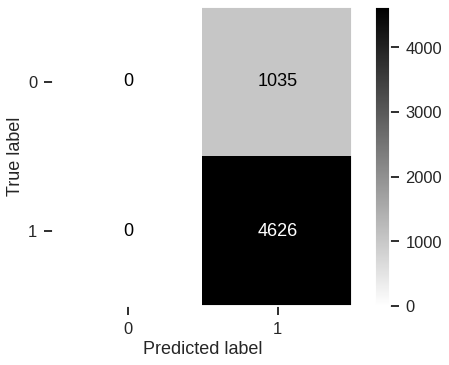

In [ ]:
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
print(classification_report(y_test, y_pred))
print('')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classifier, x_test, y_test,cmap="binary")
plt.grid(False)
plt.show()

Logistic Regression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=13)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))
print('')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.93

              precision    recall  f1-score   support

           0       0.81      0.33      0.47      1035
           1       0.87      0.98      0.92      4626

    accuracy                           0.86      5661
   macro avg       0.84      0.66      0.70      5661
weighted avg       0.86      0.86      0.84      5661

[[ 343  692]
 [  83 4543]]


KNN Classifier

              precision    recall  f1-score   support

           0       0.81      0.33      0.47      1035
           1       0.87      0.98      0.92      4626

    accuracy                           0.86      5661
   macro avg       0.84      0.66      0.70      5661
weighted avg       0.86      0.86      0.84      5661


------------------------
Confusion Matrix
------------------------

[[ 343  692]
 [  83 4543]]


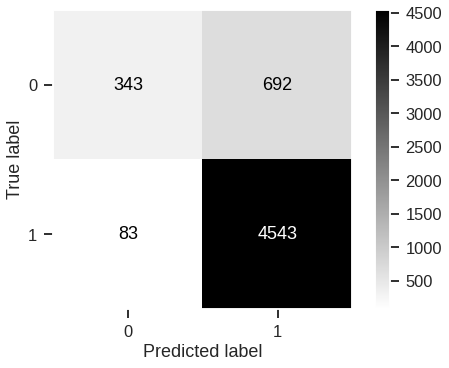

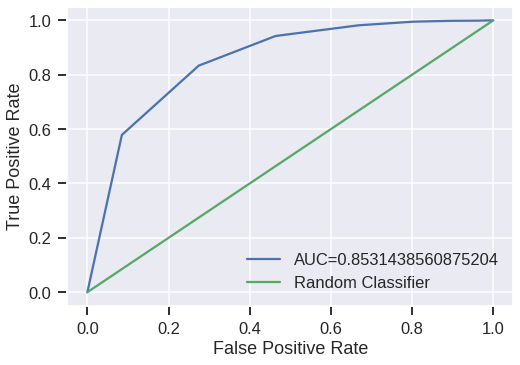

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=13)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
print(classification_report(y_test, y_pred))
print('')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(knn, x_test, y_test,cmap="binary")
plt.grid(False)
plt.show()
y_pred_proba = knn.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
x_r=[0,1]
y_r=[0,1]
plt.plot(x_r,y_r,label='Random Classifier')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Gaussian Navie Bayes

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      1035
           1       0.97      0.93      0.95      4626

    accuracy                           0.92      5661
   macro avg       0.86      0.91      0.88      5661
weighted avg       0.93      0.92      0.93      5661


------------------------
Confusion Matrix
------------------------

[[ 923  112]
 [ 318 4308]]


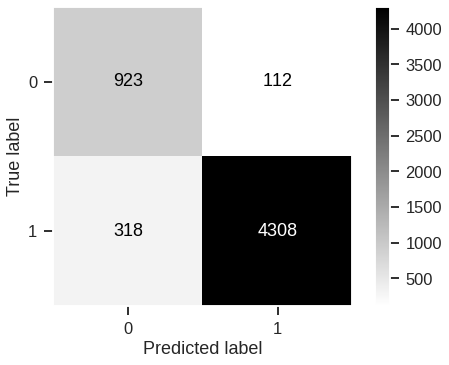

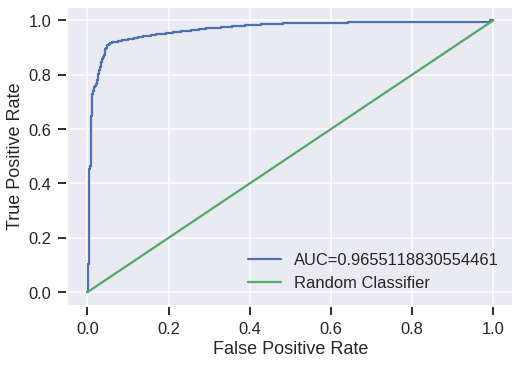

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred=gnb.predict(x_test)
print(classification_report(y_test, y_pred))
print('')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(gnb, x_test, y_test,cmap="binary")
plt.grid(False)
plt.show()

y_pred_proba = gnb.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
x_r=[0,1]
y_r=[0,1]
plt.plot(x_r,y_r,label='Random Classifier')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.75      0.95      0.84      1035
           1       0.99      0.93      0.96      4626

    accuracy                           0.93      5661
   macro avg       0.87      0.94      0.90      5661
weighted avg       0.94      0.93      0.94      5661


------------------------
Confusion Matrix
------------------------

[[ 984   51]
 [ 326 4300]]


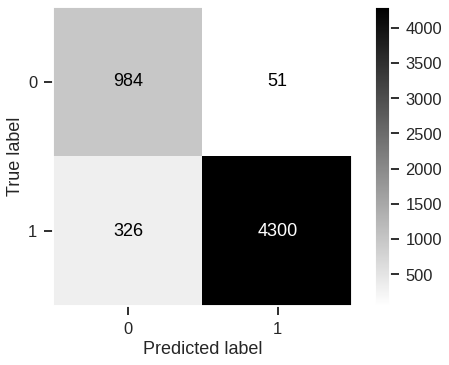

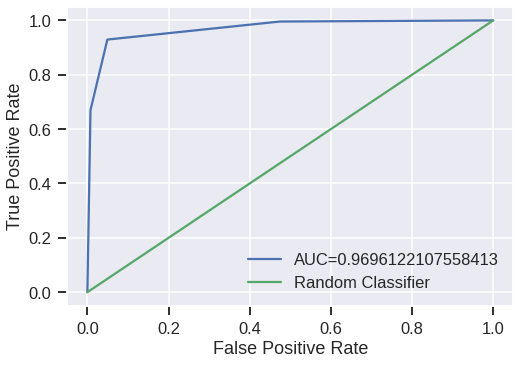

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=13)
clff = GradientBoostingClassifier(n_estimators=18, learning_rate=0.2, max_depth=1, random_state=23)
clff.fit(x_train, y_train)
y_pred=clff.predict(x_test)
print(classification_report(y_test, y_pred))
print('')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clff, x_test, y_test,cmap="binary")
plt.grid(False)
plt.show()

y_pred_proba = clff.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
x_r=[0,1]
y_r=[0,1]
plt.plot(x_r,y_r,label='Random Classifier')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Random Forrest Classifier

              precision    recall  f1-score   support

           0       0.78      0.86      0.81      1035
           1       0.97      0.95      0.96      4626

    accuracy                           0.93      5661
   macro avg       0.87      0.90      0.89      5661
weighted avg       0.93      0.93      0.93      5661


------------------------
Confusion Matrix
------------------------

[[ 885  150]
 [ 253 4373]]


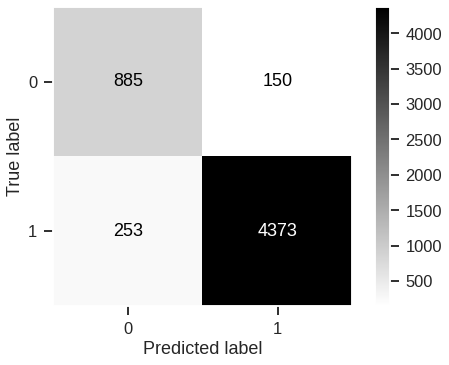

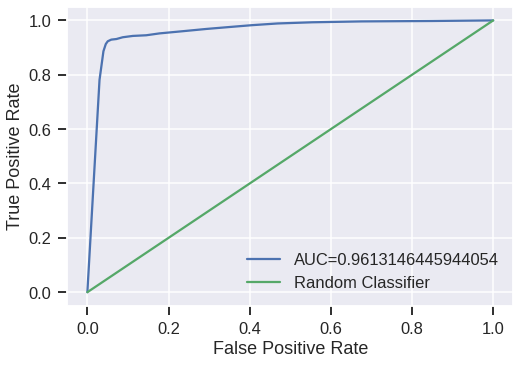

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=13)
clf=RandomForestClassifier(n_estimators=18,min_samples_split= 2,
                           min_samples_leaf= 1,max_features='sqrt',max_depth=None, bootstrap=True)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
import warnings
warnings.filterwarnings("ignore")
print(classification_report(y_test, y_pred))
print('')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf, x_test, y_test,cmap="binary")
plt.grid(False)
plt.show()

y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
x_r=[0,1]
y_r=[0,1]
plt.plot(x_r,y_r,label='Random Classifier')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Text Mining and Data Preparation for Neural Network

In [ ]:
import os
import plotly.graph_objects as go
from wordcloud import WordCloud
import plotly.express as px
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk import word_tokenize
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import Embedding
from keras.layers import GlobalAvgPool1D
import tensorflow as tf

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [ ]:
data = data.drop(['Title', 'Clothing ID', 'Positive Feedback Count'], axis=1)
data.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses
2,2,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants
4,4,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses


In [ ]:
data = data.dropna(subset=['Review Text', 'Division Name', 'Department Name', 'Class Name'], axis=0)
data = data.reset_index(drop=True)

In [ ]:
FreqOfWords = data['Review Text'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:50]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
fig.update_layout(title_text='Top Frequent 50 Words in the Dataset (Before Cleaning)',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

In [ ]:
# Lower Character all the Texts
data['Review Text'] = data['Review Text'].str.lower()
data['Review Text'].head()

0    absolutely wonderful - silky and sexy and comf...
1    love this dress!  it's sooo pretty.  i happene...
2    i had such high hopes for this dress and reall...
3    i love, love, love this jumpsuit. it's fun, fl...
4    this shirt is very flattering to all due to th...
Name: Review Text, dtype: object

In [ ]:
# Removing Punctuations and Numbers from the Text
def remove_punctuations_numbers(inputs):
    return re.sub(r'[^a-zA-Z]', ' ', inputs)


data['Review Text'] = data['Review Text'].apply(remove_punctuations_numbers)

In [ ]:
def tokenization(inputs):  # Ref.1
    return word_tokenize(inputs)


data['text_tokenized'] = data['Review Text'].apply(tokenization)
data['text_tokenized'].head()

0    [absolutely, wonderful, silky, and, sexy, and,...
1    [love, this, dress, it, s, sooo, pretty, i, ha...
2    [i, had, such, high, hopes, for, this, dress, ...
3    [i, love, love, love, this, jumpsuit, it, s, f...
4    [this, shirt, is, very, flattering, to, all, d...
Name: text_tokenized, dtype: object

In [ ]:
# Removing Stop Words
stop_words = set(stopwords.words('english'))
stop_words.remove('not')


def stopwords_remove(inputs):  # Ref.2
    return [k for k in inputs if k not in stop_words]


data['text_stop'] = data['text_tokenized'].apply(stopwords_remove)
data['text_stop'].head()

0    [absolutely, wonderful, silky, sexy, comfortable]
1    [love, dress, sooo, pretty, happened, find, st...
2    [high, hopes, dress, really, wanted, work, ini...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
Name: text_stop, dtype: object

In [ ]:
# Lemmatization

lemmatizer = WordNetLemmatizer()


def lemmatization(inputs):  # Ref.1
    return [lemmatizer.lemmatize(word=kk, pos='v') for kk in inputs]


data['text_lemmatized'] = data['text_stop'].apply(lemmatization)
data['text_lemmatized'].head()

0    [absolutely, wonderful, silky, sexy, comfortable]
1    [love, dress, sooo, pretty, happen, find, stor...
2    [high, hop, dress, really, want, work, initial...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flatter, due, adjustable, front, tie, ...
Name: text_lemmatized, dtype: object

In [ ]:
# Removing Words less than length 2
def remove_less_than_2(inputs):  # Ref.1
    return [j for j in inputs if len(j) > 2]


data['final'] = data['text_lemmatized'].apply(remove_less_than_2)

In [ ]:
data['final'] = data['final'].str.join(' ')
data['final'].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happen find store glad ...
2    high hop dress really want work initially orde...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flatter due adjustable front tie perfect...
Name: final, dtype: object

In [ ]:
FreqOfWords = data['final'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:50]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
fig.update_layout(title_text='Top Frequent 50 Words in the Dataset (After Cleaning)',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

In [ ]:
data['length_of_text'] = [len(i.split(' ')) for i in data['final']]
fig = px.histogram(data['length_of_text'],
                   labels={"value": "Length of the Text",
                           "color": 'Recommended?'},
                   color=data['Recommended IND'])

fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Length of the Texts after Cleaning',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='overlay')
fig.show()

In [ ]:
y = data['Recommended IND']
X = data['final']

X.head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happen find store glad ...
2    high hop dress really want work initially orde...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flatter due adjustable front tie perfect...
Name: final, dtype: object

In [ ]:
x, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=13)  # Test: %20

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=13)  # Val: %20

print('Shape of the X_train:', X_train.shape)
print('Shape of the X_test:', X_test.shape)
print('Shape of the X_val:', X_val.shape)
print('--'*20)
print('Shape of the y_train:', y_train.shape)
print('Shape of the y_test:', y_test.shape)
print('Shape of the y_val:', y_val.shape)

Shape of the X_train: (13576,)
Shape of the X_test: (4526,)
Shape of the X_val: (4526,)
----------------------------------------
Shape of the y_train: (13576,)
Shape of the y_test: (4526,)
Shape of the y_val: (4526,)


In [ ]:
num_words = 10000
tokenizer = Tokenizer(num_words=num_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

Tokenized_train = tokenizer.texts_to_sequences(X_train)
Tokenized_val = tokenizer.texts_to_sequences(X_val)

print('Non-tokenized Version: ', X_train[3])
print('Tokenized Version with TensorFlow: ', tokenizer.texts_to_sequences([X_train[3]]))
print('--'*20)
print('Non-tokenized Version: ', X_train[81])
print('Tokenized Version with TensorFlow: ', tokenizer.texts_to_sequences([X_train[81]]))

Non-tokenized Version:  love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
Tokenized Version with TensorFlow:  [[5, 5, 5, 453, 182, 893, 626, 205, 96, 6, 15, 348, 12, 127]]
----------------------------------------
Non-tokenized Version:  love top great design comfortable unique soft material
Tokenized Version with TensorFlow:  [[5, 9, 12, 71, 33, 179, 28, 37]]


In [ ]:
maxlen = 50
Padded_train = pad_sequences(Tokenized_train, maxlen=maxlen, padding='pre')
Padded_val = pad_sequences(Tokenized_val, maxlen=maxlen, padding='pre')

In [ ]:
from keras.layers import LSTM
# Creating the Model
model = Sequential()

model.add(Embedding(num_words, 16, input_length=maxlen))
model.add(Dropout(0.2))

model.add(GlobalAvgPool1D())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

opt = tf.optimizers.Adam(lr=0.55e-3)  # Learning Rate

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 dropout (Dropout)           (None, 50, 16)            0         
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160,017
Trainable params: 160,017
Non-trainable params: 0
__________________________________________________

In [ ]:
# Training the Model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='auto', patience=5,
                                                  restore_best_weights=True)

epochs = 100
hist = model.fit(Padded_train, y_train, epochs=epochs,
                 validation_data=(Padded_val, y_val),
                 callbacks=[early_stopping], batch_size=32)

Epoch 1/100
425/425 [==============================] - 6s 8ms/step - loss: 0.5686 - accuracy: 0.8051 - val_loss: 0.4703 - val_accuracy: 0.8239
Epoch 2/100
425/425 [==============================] - 2s 6ms/step - loss: 0.4660 - accuracy: 0.8201 - val_loss: 0.4410 - val_accuracy: 0.8239
Epoch 3/100
425/425 [==============================] - 2s 6ms/step - loss: 0.4463 - accuracy: 0.8201 - val_loss: 0.4251 - val_accuracy: 0.8239
Epoch 4/100
425/425 [==============================] - 3s 6ms/step - loss: 0.4300 - accuracy: 0.8201 - val_loss: 0.4082 - val_accuracy: 0.8239
Epoch 5/100
425/425 [==============================] - 2s 6ms/step - loss: 0.4118 - accuracy: 0.8201 - val_loss: 0.3899 - val_accuracy: 0.8243
Epoch 6/100
425/425 [==============================] - 4s 8ms/step - loss: 0.3907 - accuracy: 0.8206 - val_loss: 0.3705 - val_accuracy: 0.8252
Epoch 7/100
425/425 [==============================] - 4s 10ms/step - loss: 0.3710 - accuracy: 0.8244 - val_loss: 0.3507 - val_accuracy: 0.831

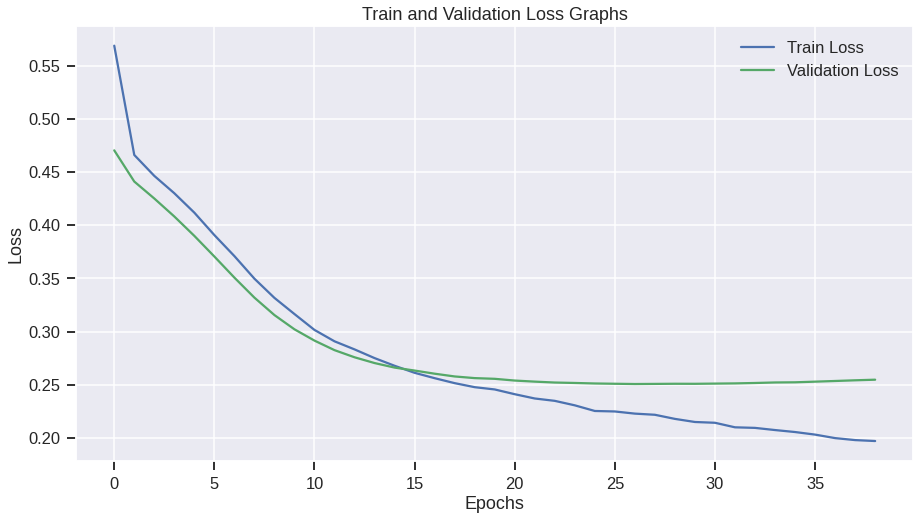

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss Graphs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

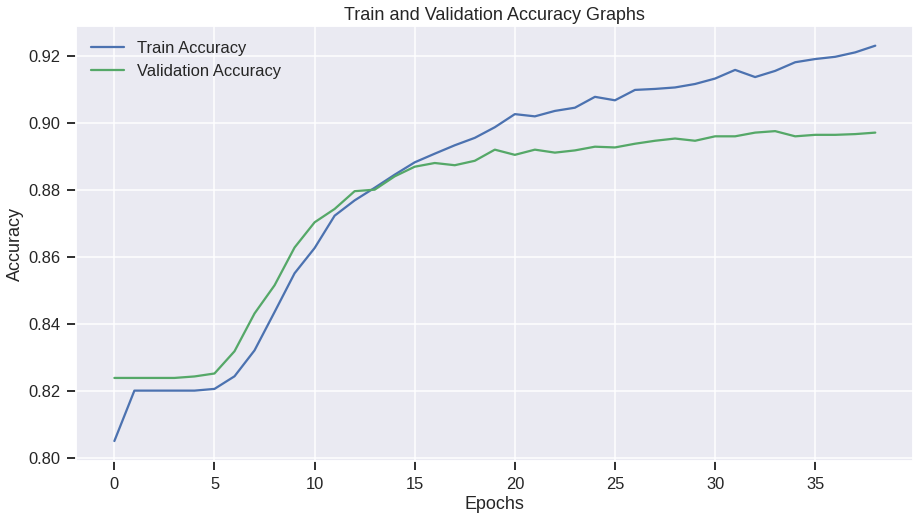

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy Graphs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
X_test = X_test.apply(tokenization)
X_test = X_test.apply(stopwords_remove)
X_test = X_test.apply(lemmatization)
X_test = X_test.str.join(' ')

X_test.head()

10818                              low waisted weird liner
779      shirt not good look gal hips fit top tight ord...
10907    love dress long enough dramatic graze feet wit...
17442    understand pencil skirt gon body hug however r...
832      order shirt wear pair pant return one reason t...
Name: final, dtype: object

In [ ]:
Tokenized_test = tokenizer.texts_to_sequences(X_test)
Padded_test = pad_sequences(Tokenized_test, maxlen=maxlen, padding='pre')

test_evaluate = model.evaluate(Padded_test, y_test)

142/142 [==============================] - 0s 2ms/step - loss: 0.2681 - accuracy: 0.8891


In [ ]:
pred_train_lstm = model.predict(Padded_train)
pred_test_lstm = model.predict(Padded_test)

142/142 [==============================] - 0s 1ms/step


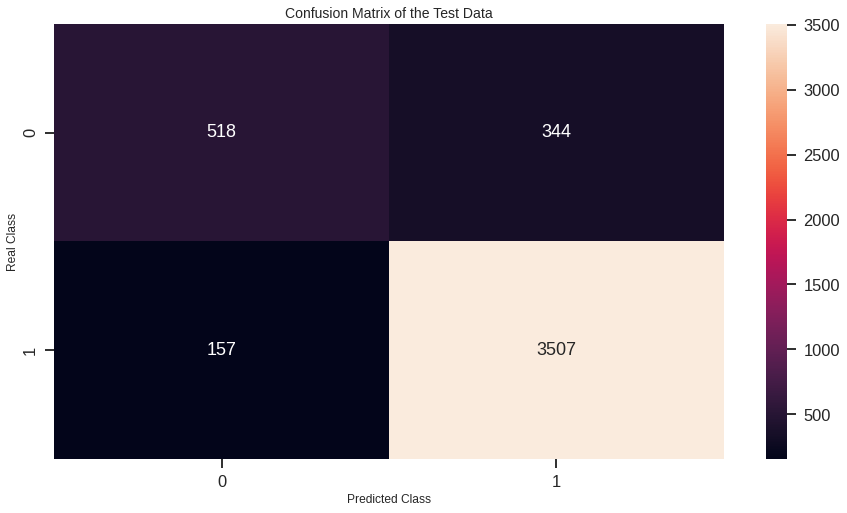

In [ ]:
for i, x in enumerate(pred_test_lstm):
    if 0 <= x < 0.49:
        pred_test_lstm[i] = 0
    else:
        pred_test_lstm[i] = 1

for i, x in enumerate(pred_train_lstm):
    if 0 <= x < 0.49:
        pred_train_lstm[i] = 0
    else:
        pred_train_lstm[i] = 1

conf_mat = confusion_matrix(y_true=y_test, y_pred=pred_test_lstm)
plt.figure(figsize=(15, 8))
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.title('Confusion Matrix of the Test Data', fontsize=14)
plt.ylabel('Real Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Accuracy
train_acc_lstm = round(accuracy_score(y_train, pred_train_lstm) * 100, 2)
print('Train Accuracy of the LSTM: %', train_acc_lstm)
test_acc_lstm = round(accuracy_score(y_test, pred_test_lstm) * 100, 2)
print('Test Accuracy of the LSTM: %', test_acc_lstm)
print('--' * 20)

# Precision
train_precision_lstm = round(precision_score(y_train, pred_train_lstm) * 100, 2)
print('Train Precision of the LSTM: %', train_precision_lstm)
precision_lstm = round(precision_score(y_test, pred_test_lstm) * 100, 2)
print('Test Precision of the LSTM: %', precision_lstm)
print('--' * 20)

# Recall
train_recall_lstm = round(recall_score(y_train, pred_train_lstm) * 100, 2)
print('Train Recall of the LSTM: %', train_recall_lstm)
recall_lstm = round(recall_score(y_test, pred_test_lstm) * 100, 2)
print('Test Recall of the LSTM: %', recall_lstm)

Train Accuracy of the LSTM: % 92.18
Test Accuracy of the LSTM: % 88.93
----------------------------------------
Train Precision of the LSTM: % 93.82
Test Precision of the LSTM: % 91.07
----------------------------------------
Train Recall of the LSTM: % 96.85
Test Recall of the LSTM: % 95.72
